Sentiment Analysis using twitter API.
The following piece of code imports the libraries, does the authetification and then get the tweets from the api and inset them in a csv file.

In [ ]:
import tweepy as tw
import pandas as pd
import csv
import re
from textblob import TextBlob

consumer_key = 'J0bRqS6dcrY5AACoITT28XKo8'
consumer_secret = 'HRH9JT8WR9Fs564D6ZnZQLItYp7Q7CsdkUDOWdd0Y8KRr0Xocn'
access_key= '975366875088646144-OTWStKYNYIKcenH2Wbq93eEmwX65J3x'
access_secret = 'VQCgnao69d5GxXQb9bPNrcKseXyS5zOuBOlqFnWRihi0D'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)


# Define the search term and the date_since date as variables
search_words = ["#JoeBiden"]
#user = "joaquinphoenix"
date_since = "2020-11-01"

def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())



def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'


# Collect tweets
tweets = tw.Cursor(api.search, q=search_words, lang="en", since=date_since, tweet_mode="extended").items(1000)
#tweets = tw.Cursor(api.user_timeline, id=user, lang="en", since=date_since, tweet_mode="extended").items(200)




# Collect a list of tweets
tweet_list = [clean_tweet(tweet.full_text) for tweet in tweets]
#print(tweet_list)
sentiment_list = [get_tweet_sentiment(tweet) for tweet in tweet_list]
#print(sentiment_list)

tweets_and_sentiments = pd.DataFrame({"Text":tweet_list, "Sentiment":sentiment_list})
tweets_and_sentiments.to_csv("Coronavirus.csv", index=False)

#print(tweets_and_sentiments)


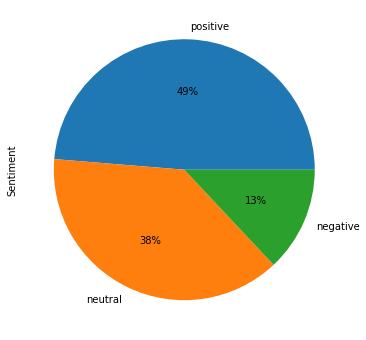

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

#imports and reads the dataset
data = "Coronavirus.csv"
tweets_list = pd.read_csv(data)
#print(tweets_list)


#set the plot size
plot_size = plt.rcParams["figure.figsize"]

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size


#plt.subplot(2, 1, 2) #divides the window in two plots
tweets_list.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')#creates a pie graph

plt.show()#displays the plot window


positive    487
neutral     383
negative    130
Name: Sentiment, dtype: int64


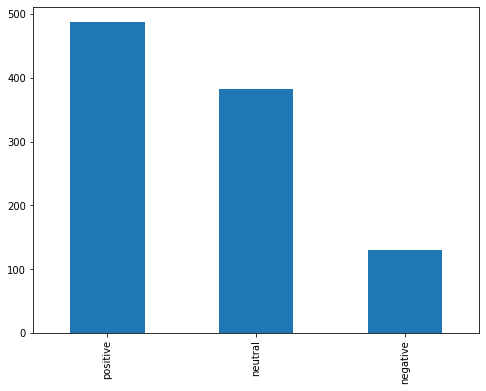

In [ ]:
tweets_list.Sentiment.value_counts().plot(kind='bar')#creates a pie graph

print(tweets_list.Sentiment.value_counts())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = tweet_list

print(corpus)

#vectorizer = CountVectorizer(max_features=2500, min_df=7, max_df=0.8)
vectorizer = CountVectorizer(max_features=2500)
#print( vectorizer.fit_transform(corpus).toarray() )
processed_features = vectorizer.fit_transform(corpus).toarray()
#print(processed_features)


#print( vectorizer.vocabulary_ )
#print(vectorizer.vocabulary_.values())


['RT The Ukraine Want s JoeBiden on Class A FelonyCharges via', 'RT Just concede JoeBiden before you end up in prison with the rest of the lot BidenConcedeNOW', 'The Ukraine Want s JoeBiden on Class A FelonyCharges via', 'When Democrat LeftMedia BigTech losers JoeBiden go on bs unity amp healing what you dont know is if Americans knew what toxic hatecrimes they secretly engage in 24 7 the people would die from shock The internet is nothing but a Mossad CIA toxic hate genocidal warcrime CULT', 'Fools It s cool though VBNMW triumphed in uniting against the worlds children and future generations SorryKids JoeBiden USA', 'RT ATEN YOUNG PHARAOH MAINSTREAM MEDIA FALSELY DECLARED JOE BIDEN WINNER OF ELECTION SEE FULL VIDEO ON YOUTUBE', 'RT America Assembled', 'Pelosi nominated as speaker to lead House Democrats into Biden presidency USElection2020 JoeBiden NancyPelosi SpeakerPelosi', 'RT ATEN YOUNG PHARAOH MAINSTREAM MEDIA FALSELY DECLARED JOE BIDEN WINNER OF ELECTION SEE FULL VIDEO ON YOUTUB

In [ ]:
from sklearn.model_selection import train_test_split

#features = tweets.iloc[:, 10].values  
labels = sentiment_list

#print(features)
print(labels)
print(len(labels))

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0) 

print(len(X_train),len(X_test), len(y_train), len(y_test))


['neutral', 'neutral', 'neutral', 'negative', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'neutral', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'neutral', 'negative', 'positive', 'negative', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'neutral', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'posi

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
text_classifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictions = text_classifier.predict(X_test) 
#print(predictions)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print('ACCURACY = ', accuracy_score(y_test, predictions)) 

[[10  8 10]
 [ 0 74  6]
 [ 1 11 80]]
              precision    recall  f1-score   support

    negative       0.91      0.36      0.51        28
     neutral       0.80      0.93      0.86        80
    positive       0.83      0.87      0.85        92

    accuracy                           0.82       200
   macro avg       0.85      0.72      0.74       200
weighted avg       0.83      0.82      0.81       200

ACCURACY =  0.82
